# MULTICLASS IMAGE CLASSIFICATION  USING KERAS - FOOD101 DATASET

![alt text](https://www.vision.ee.ethz.ch/datasets_extra/food-101/static/img/food-101.jpg)

# Table of Content

#### [Introduction](#0):
 - [Project Description](#1)
 - [Approach](#2)
 - [Results](#3)
 - [Thoughts/Challenges](#4)
 - [Deep Learning Libraries Versions](#5)
 - [Important Note](#55)

#### [1) Dataset Exploration](#6)
 - [a) Images shape/Mode/Format](#7)
 - [b) Images Plotting](#8)
 
#### [2) Image preprocessing](#9)
 - [a) Preprocessing functions](#10)

#### [3) Data Augmentation](#12)

#### [4) Train/Test Split](#13)

#### [5) Hdf5 Dataset Builder : 50 Classes](#14)

#### [ 6) Training - Applying Transfer Learning with ResNEt50 Pretrained Model](#15)
 - [A) A note on ResNet50](#16)
 - [B) TRAINING](#17)
  - [1) Configuration 1: Freeze all layers](#17)
  - [2) Configuration 2: Freeze all layers for few epochs then unfreeze the entire network](#18)
  - [3) Configuration 3: Fine tune the entire Network](#19)
  
#### [ 7) Best Model Evaluation](#20)
 - [Option 1: Standard Method](#21)
 - [Option 2: Test Time Augmentation](#22)
 

#### [ 8) References](#24)

<a id="0"></a>
# Introduction

<a id="1"></a>
## Project Description

As a challenge for myself and a great way to practice Deep learning, I choose to work on a project related to Computer Vision, and more precisely, on object Classification.

Computer Vision is a hot and exciting domain which applications goes from Facial Recognition, Autonomous vehicles (Self-driving cars), Medical Image Analysis (Cancer Detection),Real-time Sports tracking, Behaviorial tracking (retail industry), Inventory Management...

This is a domain I wish to work in so this project is a great way to "learn by doing".

In this project, we will work with State of the Art Models (CNNs) in the subfield of Computer Vision: "Image Classification".

I chose to use a pretrained image classifier (ResNet50) and apply it on a new dataset that looks interesting.  
The Dataset I will work with is the __FOOD101 dataset__, avaliable [here](https://www.vision.ee.ethz.ch/datasets_extra/food-101/).

`This Dataset is a challenging data set of 101 food categories, with 101'000 images. For each class, 250 manually reviewed test images are provided as well as 750 training images. On purpose, the training images were not cleaned, and thus still contain some amount of noise. This comes mostly in the form of intense colors and sometimes wrong labels. All images were rescaled to have a maximum side length of 512 pixels.`


#### Objective:

Our goal is to build an accurate Model that will be able to recognize and classify correctly images of different categories of food, like Hamburgers, Apple pies.



<a id="2"></a>
## Approach

I have been inspired by a lot of different ressources online, but the one that helped me the most is probably the [blog](https://www.pyimagesearch.com/) and books of Dr Adrian Rosebrock (Deep Learning for Computer Vision).

I also had to do lots of experiments and choose a good and reliable server instance that I would be confident working with.
I choose to work on __FLOYDHUB.COM__, a Deep Learning Platform that provides easy access to  Cloud GPUs, CPUs and storage to train models.
They offer 2 different types of GPUs, which consumption is billed per hour or minute:
- Standard GPU: Tesla K80 · 12 GB Memory · 61 GB RAM · 100 GB SSD
- High Performance GPU: Tesla V100 · 16 GB Memory · 61 GB RAM · 100 GB SSD

This Project and following experiments are totally reproducible but I would suggest to have enough RAM and a good performing GPU. 

I decided to train a Model on 50% of the whole dataset only. I randomly assign a subset of it because it would take too long to work on the full dataset.
I felt working on 50% of it would still give me a good idea on the peformance of the model and the robustness of this experiemnt.

I have spent about 2-3 weeks on this project, training tens of models, explored  different areas such as "training time optimization", "cloud platform experimentation" and a lot of research.

At this spoint, I start to understand that training deep neural networks is part science, part art. Practicing is the only way to learn. 

<a id="3"></a>
## Results

As mentioned earlier, I have worked with 50% of the entire Dataset. I randomly picked 50 different categories of food from the entire dataset and divided this subset as follow:
- 600 images per category of food were used for the Training set.
- 150 images per category of food were used for the Validation set.
- 250 images per category of food were used for the Testing set.

__After fine tuning a ResNet50 model, I was able to achieve 85.67% (Rank-1 Accuracy) on the Test set, and 94.24% (Rank-5 Accuracy).__

__Other approach were able to obtain up to 90% rank-1 accuracy on the whole dataset.__

<a id="4"></a>
## Thoughts / Challenges

- Working with large datasets is time consuming and computationaly intensive. I spent lot of time on looking for an efficient manner to load images in batch in order to fasten the training process. I finally managed to efficiently store my dataset into the HDF5 format, which is optimized for I/O operations. (Definitly faster than the default Data Generator packed with Keras).

- I wasted lot of time at the beginning of the project, I was experimenting on the entire dataset. Next time I will start directly by taking a subset of the dataset, experiment first with few models, assess performance and if necesary apply what I learned from the subset to the full dataset.

- I had the chance to explore transfer learning, I learned a lot by experimenting. This gives me the motivation and confidence to practice further on challenging problems in the field of Computer Vision.

<a id="55"></a>
## Important Note

At the beginning of my exepriments with the pretrained ResNet50 Model in Keras, I was doing transfer learning by freezing first all the layers except my custom built classifier. I had doubtful results, my validation loss was stuck at around 2%, not matter how many epochs or hyperparamters and configurations I was using. After a quick research on the web, I found that is was a common issue that many people had.

I started looking at this [link](https://github.com/keras-team/keras/issues/9214), then this [one](https://github.com/keras-team/keras/pull/9965).

It seems that:
`During fine-tuning, if a Batch Normalization layer is frozen it uses the mini-batch statistics. I believe this is incorrect and it can lead to reduced accuracy especially when we use Transfer learning. A better approach in this case would be to use the values of the moving mean and variance.`

I then decided to use the ResNEt50 implementation of [Datumbox](https://github.com/datumbox/keras/tree/bugfix/trainable_bn), which fixes the Batch Normalization layer problem.
I had no more problem after using this configuration.
__Below is the Keras installation using this bug fix__

In [2]:
# !pip install -U --force-reinstall --no-dependencies git+https://github.com/datumbox/keras@bugfix/trainable_bn

<a id="5"></a>
## Deep Learning Libraries Versions

I worked throughout this project with the following Deeplearning python libraries versions:

In [3]:
# show preferred channel order
import tensorflow as tf
import keras
from keras import backend
print(backend.image_data_format())

channels_last


Using TensorFlow backend.


In [4]:
keras.__version__

'2.2.4'

In [5]:
tf.__version__

'1.13.1'

<a id="6"></a>
# 1) Dataset Exploration
<a id="7"></a>
## a) Images Shapes/Mode/Format

Let's import all of the packages needed for the rest of this section:

In [7]:
# !pip install progressbar
# !pip install imutils

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline
import os
import numpy as np
import pandas as pd
import progressbar
import json
import cv2
import shutil
from PIL import Image
from imutils import paths

np.random.seed(23)

For this exploration phase, I worked on my own computer. I downloaded the dataset and its related files from [here](https://www.vision.ee.ethz.ch/datasets_extra/food-101/).

The folder downloaded contains:
- a README.txt file
- an 'images' folder containing 101000 images splitted into 101 food categories. 
- a license_agreement.txt  
- a 'meta' folder that contains the training and testing split mapping information:
 - 'train.json'
 - 'test.json'
 - 'train.txt'
 - 'test.txt'
 - 'classes.txt'
 - 'labels.txt'

The entire compressed dataset is 5GB in size.

****
#### Firstly, we will gather some basic information on our images.
Especially, we want to know :
- Images Shape
- Images Color Space (All images are in RGB?)
- Images format (JPEG, PNG?)

Here I will create a simple Pandas dataframe to gather those informations.

In [9]:
if not os.path.isfile('Infos_images.csv'):
    def images_info():
        root_dir = '/Users/GeYu/Desktop/DATASET/food-101/images/'
        all_classes = sorted(os.listdir(root_dir))
        all_classes = all_classes[1:]
        df = pd.DataFrame(columns=["Classe","Image","Format","Mode","Size"],index=range(101000))
        idx=0
        for c in all_classes:
            for i in os.listdir(os.path.join(root_dir,c)):
                img = Image.open(os.path.join(root_dir,c,i))
                df.loc[idx,"Classe"]=c
                df.loc[idx,"Image"]=i
                df.loc[idx,"Format"]=img.format
                df.loc[idx,"Mode"]=img.mode
                df.loc[idx,"Size"]=img.size
                idx+=1
                print(idx)
        return df
    info = images_info()
    info.to_csv("Infos_images.csv", encoding='utf-8', index=False)
else:
    return("DATAFRAME ON IMAGE INFORMATION ALREADY EXIST")

'DATAFRAME ON IMAGE INFORMATION ALREADY EXIST'

In [10]:
df_images = pd.read_csv("Infos_images.csv", encoding="utf-8")

In [11]:
print(df_images.shape)
df_images.head()

(101000, 5)


Classe        Image Format Mode        Size
0  apple_pie  2853890.jpg   JPEG  RGB  (512, 512)
1  apple_pie  2968812.jpg   JPEG  RGB  (512, 512)
2  apple_pie   535444.jpg   JPEG  RGB  (512, 512)
3  apple_pie  1579622.jpg   JPEG  RGB  (512, 511)
4  apple_pie  3134347.jpg   JPEG  RGB  (512, 512)

Just for double checking purposes, we can assert that our dataset is composed of __101000 images.__

__Let's explore now the different food categories:__

In [12]:
df_images["Classe"].unique()

array(['apple_pie', 'baby_back_ribs', 'baklava', 'beef_carpaccio',
       'beef_tartare', 'beet_salad', 'beignets', 'bibimbap',
       'bread_pudding', 'breakfast_burrito', 'bruschetta', 'caesar_salad',
       'cannoli', 'caprese_salad', 'carrot_cake', 'ceviche',
       'cheese_plate', 'cheesecake', 'chicken_curry',
       'chicken_quesadilla', 'chicken_wings', 'chocolate_cake',
       'chocolate_mousse', 'churros', 'clam_chowder', 'club_sandwich',
       'crab_cakes', 'creme_brulee', 'croque_madame', 'cup_cakes',
       'deviled_eggs', 'donuts', 'dumplings', 'edamame', 'eggs_benedict',
       'escargots', 'falafel', 'filet_mignon', 'fish_and_chips',
       'foie_gras', 'french_fries', 'french_onion_soup', 'french_toast',
       'fried_calamari', 'fried_rice', 'frozen_yogurt', 'garlic_bread',
       'gnocchi', 'greek_salad', 'grilled_cheese_sandwich',
       'grilled_salmon', 'guacamole', 'gyoza', 'hamburger',
       'hot_and_sour_soup', 'hot_dog', 'huevos_rancheros', 'hummus',
       

In [13]:
print("There is {} distinct categories of food in our dataset".format(len(df_images["Classe"].unique())))
print("There is {} images per categories of food in our dataset".format(df_images.groupby("Classe").count()["Image"].unique()))

There is 101 distinct categories of food in our dataset
There is [1000] images per categories of food in our dataset


 Let's split our Size column and add Height and Width columns for each image. It will ease our findings on image shapes later on.

We will also create a "number of Channels" column to see if we are working with only colored images.

In [14]:
df_images["Size"] = df_images["Size"].str.replace("(","").str.replace(")","")
df_images["Height"] = df_images["Size"].str[4:8].astype("int")
df_images["Width"] = df_images["Size"].str[:3].astype("int")
df_images["N#_Channels"] = [3 if x == "RGB" else 1 for x in df_images["Mode"]]
df_images.head(3)

Classe        Image Format Mode      Size  Height  Width  N#_Channels
0  apple_pie  2853890.jpg   JPEG  RGB  512, 512     512    512            3
1  apple_pie  2968812.jpg   JPEG  RGB  512, 512     512    512            3
2  apple_pie   535444.jpg   JPEG  RGB  512, 512     512    512            3

Let's find out if all our images are in __RGB__ color space.

In [15]:
df_images["Mode"].value_counts()

RGB    100997
L           3
Name: Mode, dtype: int64

Interestingly, It seems that we have __3 images in Black & White__ in our dataset. Let's diplay them on screen.

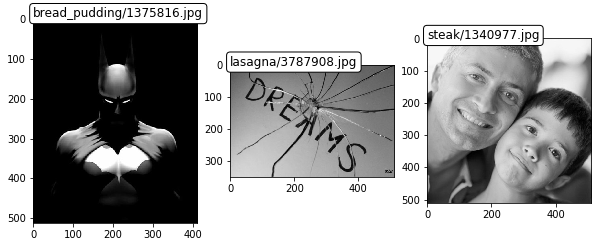

In [16]:
bw = df_images[df_images["Mode"] == "L"].reset_index()
bw["Image_path"] = bw["Classe"] + str("/") + bw["Image"]
root_dir = '/floyd/input/food101/train/'

plt.figure(figsize=(10,8))
for i in range(len(bw)):
    plt.subplot(131 + i)
    filename = root_dir + bw.loc[i,"Image_path"]
    image = Image.open(filename)
    img = plt.imshow(image)
    plt.text(0, -30, bw.loc[i,"Image_path"], size=12, rotation=0,
                    ha="left", va="top", 
                    bbox=dict(boxstyle="round", ec='black', fc='white'))
plt.show();

Reviewing the Dataset [info](https://www.vision.ee.ethz.ch/datasets_extra/food-101/), we know that the training images were not clean and this comes sometime in the form of wrong labels. Hence, we probably have mislabeled colored images as well.

Next, let's store the paths of our Black and White images and remove them from the training set later on.

In [17]:
root_dir = '/floyd/input/food101/train/'
img_path_to_rm = [root_dir + "/".join(bw.loc[i,["Classe","Image"]].values) for i in range(len(bw))]
img_path_to_rm

['/floyd/input/food101/train/bread_pudding/1375816.jpg',
 '/floyd/input/food101/train/lasagna/3787908.jpg',
 '/floyd/input/food101/train/steak/1340977.jpg']

#### 3) Distribution of image shapes:

`All images were rescaled to have a maximum side length of 512 pixels`. 

let's find out the different shapes of our images. This is an important factor to consider since most deep learning models for image classification must have squared images as input (same Height and Width).

Preprocessing images prior modelling is an important step to be performed. Having an idea of our images shapes distribution will help us understand better our dataset.

In [18]:
df_images["Size"].value_counts(normalize=True, dropna=False)[:10]*100

512, 512    61.590099
512, 384    14.644554
384, 512     6.453465
382, 512     2.850495
512, 382     2.487129
512, 341     1.493069
512, 306     1.020792
512, 289     0.901980
512, 288     0.881188
511, 512     0.537624
Name: Size, dtype: float64

#### As we see from this Frequency table of Image Shapes:
- We have 464 different image shapes.
- 61.6% of all images are squared with Width and Height 512 pixels.
- 82.5% of all images are:
  - either 512\*512 (61.6%)
  - or 512(W)\*384(H) (14.6%)
  - or 384(W)\*512(H) (6.5%)


#### What are our minimum and maximum Height and Width?

In [19]:
print("MINIMUM HEIGHT: ", df_images["Height"].min(), "| FREQUENCY: ", len(df_images[df_images["Height"]== df_images["Height"].min()]))
print("MAXIMUM HEIGHT: ", df_images["Height"].max(),"| FREQUENCY: ", len(df_images[df_images["Height"]== df_images["Height"].max()]))
print("-"*40)
print("MINIMUM WIDTH: ", df_images["Width"].min(), "| FREQUENCY: ", len(df_images[df_images["Width"]==df_images["Width"].min()]))
print("MAXIMUM WIDTH: ", df_images["Width"].max(), "| FREQUENCY: ", len(df_images[df_images["Width"]==df_images["Width"].max()]))

MINIMUM HEIGHT:  122 | FREQUENCY:  1
MAXIMUM HEIGHT:  512 | FREQUENCY:  74781
----------------------------------------
MINIMUM WIDTH:  193 | FREQUENCY:  1
MAXIMUM WIDTH:  512 | FREQUENCY:  88425


As expected, our maximum Height and Width are 512.
Our minimum height is 193 pixels with a frequency of 1, and our minimum width image is 122 pixel also with only one image in our entire dataset.

Image shapes are an important consideration prior to modelling. Most of our images are big in size (512\*512\*3= __786432 pixel values for a single image__). Loading all images at once before modelling would take a considering amount of RAM. This is not an option we would like to follow.
Instead, we will build a HDF5 datasets that enable us to load our images in batches during the training process (more about this in the next sections).

Another important information from our image shape frequency gives us some valuable insights as how we would like to preprocess them prior to feeding them to our model.

<a id="8"></a>
## b) Images plotting

In this second phase of exploration, we will plot some images of different food categories.
This will give us an understanding of our images quality and the different __factors of variations__ that our model would have to account for.

In [20]:
def plot_class(classe, rows=4, cols=5):
    root_dir = '/floyd/input/food101/train/'
    fig, ax = plt.subplots(rows, cols, frameon=False, figsize=(20, 14))
    fig.suptitle('Images from the {} class'.format(classe), fontsize=20)
    sorted_food_dirs = sorted(os.listdir(root_dir))

    for i in range(rows):
        for j in range(cols):
            all_files = os.listdir(os.path.join(root_dir, classe))
            rand_img = np.random.choice(all_files)
            img = plt.imread(os.path.join(root_dir, classe, rand_img))
            ax[i][j].imshow(img)
            ax[i][j].text(0, -30, img.shape, size=12, rotation=0,
                    ha="left", va="top", 
                    bbox=dict(boxstyle="round", ec='black', fc='white'))
    plt.setp(ax, xticks=[], yticks=[]);

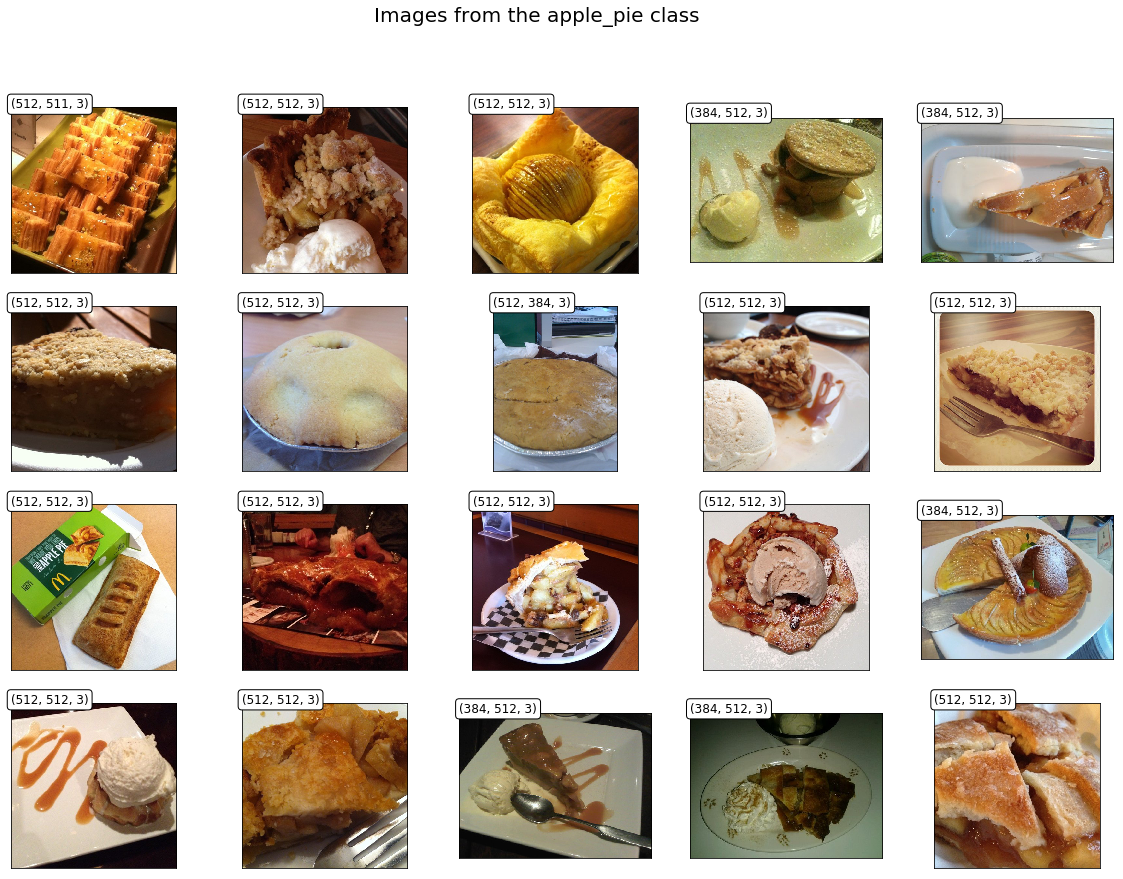

In [21]:
plot_class('apple_pie')

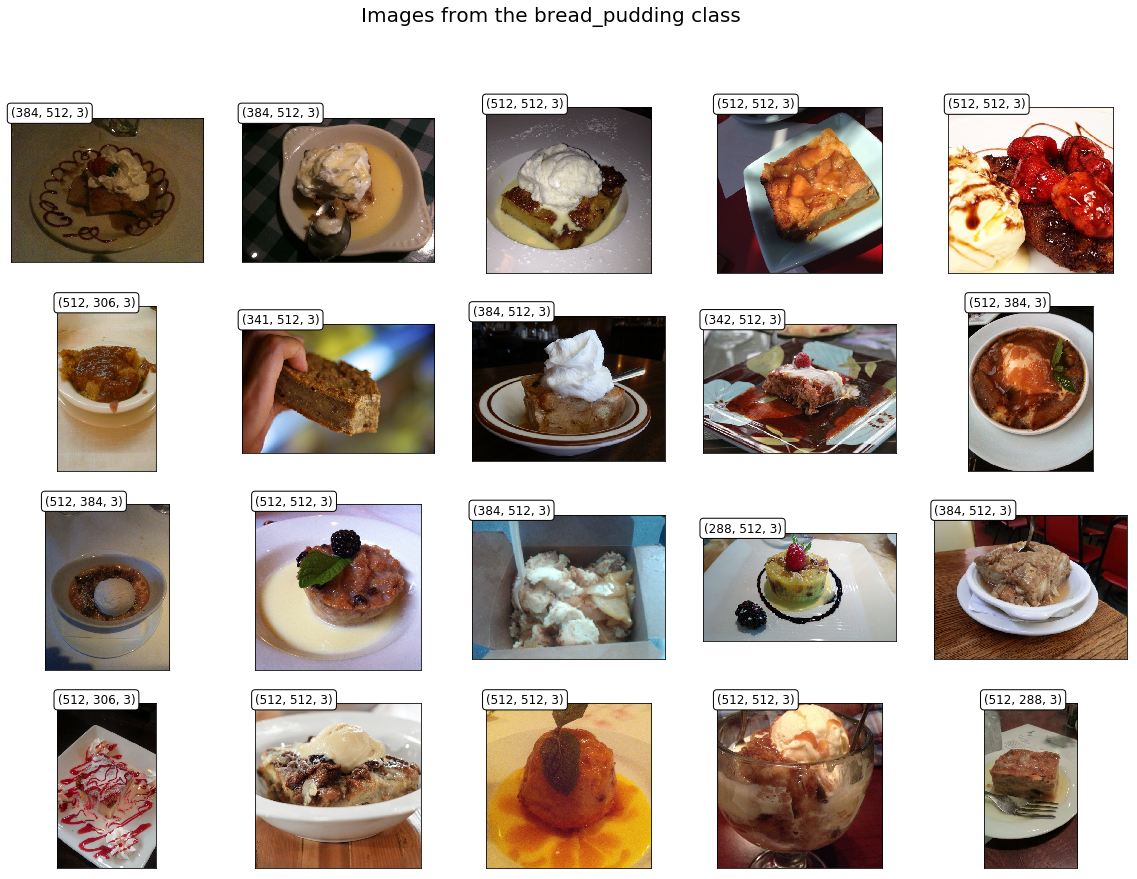

In [22]:
plot_class('bread_pudding')

Plotting random pictures from two different classes, we can clearly see why this Dataset is challenging.
The model we wish to develop will have to learn to categorize accurately each type of food, taking into account  factors of variation within each classe.
To name a few : 
- __viewpoint variation__ : pictures of a specific food category are taken from a different/non standardized angle.
- __scale variation__: pictures of a specific food category can be taken up close versus from farther away.  
- __illumination variation__ : pictures of a specific food category are taken with very different lighting conditions.
- __intraclass variation__ : perhaps the most obvious one here, taking a look at the apple-pie labelled pictures, it is already difficult for me to classify each of them as such. Each apple-pie is different from one another.

__As such, our image classifier will not only have to be robust to these variations _independantly_, but our system must also handle multiple variations _combined together_.__

***
<a id="9"></a>
# 2) Images preprocessing

Images preprocessing is an important step to consider before training a Model. The ResNet50 model expects input shapes of 224*/224*/3. It means that our images will have to be reshape/resized to this dimension before being fed to our Network.

There is multiple approach to resize images prior to modelling. the 2 most common ones are:
-  Center Cropping: given a rectangular image, we first rescale the image such that the shorter side is of a predefined lenght (256), and then cropped out the central 256 patch from the resulting image. Then, during training, a random crop of size 224*224 from those images is fed to the network. Random cropping from rescaled images helps to perform data augmentation and thus boost classification accuracy.["Krizhevsky et al"](http://papers.nips.cc/paper/4824-imagenet-classification-with-deep-convolutional-neural-networks.pdf)

- Isotropically rescaling: given a rectangle image, the image is rescaled such that the shorter side is of fixed lenght (usually 256), this allow the original imaged to be upsample or downsample. Next, the usual random cropping is performed during training with crops of 224*224. [Karen Simonyan, Andrew Zisserman](https://arxiv.org/abs/1409.1556)

In addition, Preprocessing images can also be performed during the testing phase, which usually raise model accuracy, performance and generalization to unseen data. Again the 2 most common ones are:
- An over sampling preprocessor to sample 5 regions of an input image ((the four corners + center area) along with their corresponding horizontal flips (for a total of 10 crops).These ten samples will be passed through the CNN, and then the probabilities averaged. Applying this over-sampling method tends to include 1-2 percent increases in classification accuracy.["Krizhevsky et al"](http://papers.nips.cc/paper/4824-imagenet-classification-with-deep-convolutional-neural-networks.pdf)

- A Test Time Augmentation preprocessor (TTA): the images are augmented with random transformations (random cropping, zooming, flipping, brightness ranging...). This samples will be fed to the CNN and their probability will be averaged. This tends to increase accuracy during test time.

______________________________________________________________________________________________________________________

__For this project__:

- For training and testing, I decided to resize all my images to 224*224, the aspect ratio of the original image is not kept. I decided not to perform center cropping as the objects in our images are not centered, sometimes they are at one corner, hence I wanted to avoid cropping part of a "Hamburger" for example.
- For testing, I decided to perform Test Time Augmentation.

__Next, let's define our preprocessors functions:__

<a id="10"></a>
### a) Image Preprocessing Functions:

__Simple Resized preprocessor:__

In [23]:
def SimplePreprocessor(image, width=224, height=224):
    return cv2.resize(image, (width, height))

__Image to Array preprocessor:__

In [24]:
from keras.preprocessing.image import img_to_array

def ImageToArray_Preprocessor(image):
    return img_to_array(image)

***
<a id="12"></a>
# 3) DATA AUGMENTATION

Data augmentation is a type of regularization technique that operates on the training data and can be applied to the testing data as well (TTA). As the name suggests, data augmentation randomly jitters our training data by applying a series of random translations, rotations, shears, and flips. 

Applying these simple transformations does not change the class label of the input image; however, each augmented image can be considered a “new” image that the training algorithm has not seen before. Therefore, our training algorithm is being constantly presented with new training samples, allowing it to learn more robust and discriminative patterns.

Data augmentation is another form of preprocessing function. This method is particularly used when we don't have enough training samples to be fed to our model. This technique is very helpful in synthetizing new, unseen samples from our training sets.

__Next, let's visualize Sample images before and after applying Data Augmentation__

### Explore our images before and after Data Augmentation

__Before Data Augmentation__

In [25]:
def plot_before_aug(classe):
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(8, 9))
    ax1, ax2 = axes.flatten()
#     fig.subplots_adjust(hspace=.1, wspace=0.25)
    np.random.seed(25)
    root_dir = '/floyd/input/food101/train/'
    all_files = os.listdir(os.path.join(root_dir, classe))
    rand_img = np.random.choice(all_files)
    
    fig.suptitle('Image Number: {}'.format(os.path.join(classe, rand_img), fontsize=20))
    original = cv2.imread(os.path.join(root_dir, classe, rand_img))
    original = cv2.cvtColor(original, cv2.COLOR_BGR2RGB)
    resized = cv2.resize(original, (224, 224))
    
    #left
    ax1.imshow(original)
    ax1.text(0, -30,"ORIGINAL IMAGE", size=10, rotation=0,ha="left", va="top", bbox=dict(boxstyle="round", ec='black', fc='white'))

    #right
    ax2.imshow(resized)
    ax2.text(0, -15, "Rescaled Image, S=256", size=10, rotation=0,ha="left", va="top", bbox=dict(boxstyle="round", ec='black', fc='white'))

    plt.show();

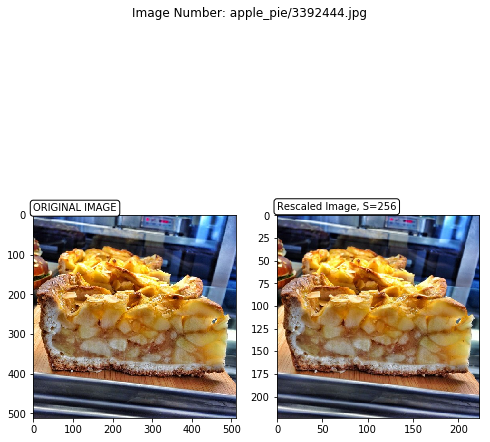

In [26]:
plot_before_aug('apple_pie')

__As we can see, our images are resized to 224*224 without keeping the original aspect ratio. Hence our images are squished if our original image is not square (same height and width)__

__After Data Augmentation__

In [27]:
from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing.image import img_to_array
from keras.preprocessing.image import load_img

In [28]:
def plot_after_aug(classe):
    fig, axes = plt.subplots(figsize=(12, 14))
    np.random.seed(25)
    root_dir = '/floyd/input/food101/train/'
    all_files = os.listdir(os.path.join(root_dir, classe))
    rand_img = np.random.choice(all_files)
    
    fig.suptitle('Image Number: {}'.format(os.path.join(classe, rand_img), fontsize=20))
    original = cv2.imread(os.path.join(root_dir, classe, rand_img))
    original = cv2.cvtColor(original, cv2.COLOR_BGR2RGB)
    resized = cv2.resize(original, (224, 224))
    image = np.expand_dims(resized, axis=0)
    Aug = ImageDataGenerator(
        rotation_range=40, 
        zoom_range=[1,1.4], 
        width_shift_range=0.2, 
        height_shift_range=0.2,  
        horizontal_flip=True, 
        fill_mode="nearest")
    imageGen = Aug.flow(image, batch_size=1)
    
    for i in range(9):
        # define subplot
        plt.subplot(330 + 1 + i)
        # generate batch of images
        batch = imageGen.next()
        # convert to unsigned integers for viewing
        image = batch[0].astype('uint32')
        # plot raw pixel data
        plt.imshow(image)
        # show the figure
    plt.show();

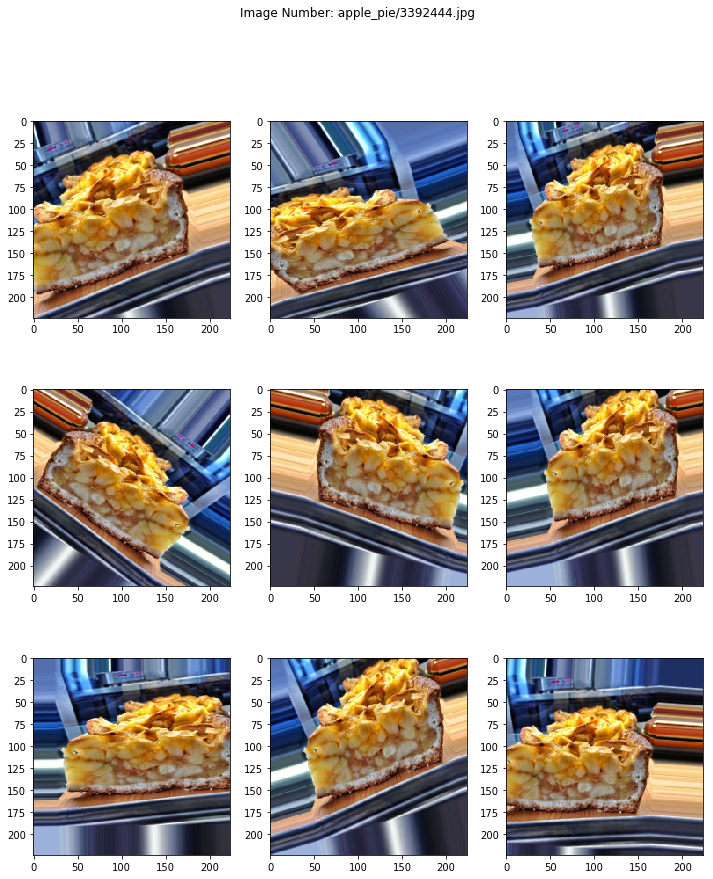

In [29]:
plot_after_aug("apple_pie")

__Data augmentation applied random transformation to our images, we can clearly see that our original image get randomly shifted, flipped, zoomed or rotated).__

***
<a id="13"></a>
# 4) TRAIN TEST SPLIT

After this exploration phase and Image preprocessing on the entire dataset, we are now ready to perform the train/test split provided by the documentation.

I have performed this trained/test split on my own computer first. I then mounted this train/test split dataset to Floydhub. Datasets needs to be mounted in FLOYDHUB, this takes around 10 minutes for a 5GB dataset folder.

In [30]:
# # Only split files if haven't already
# if not os.path.isdir('./FOOD101/food-101/dataset/test') and not os.path.isdir('./FOOD101/food-101/dataset/train'):

#     def copytree(src, dst, symlinks = False, ignore = None):
#         if not os.path.exists(dst):
#             os.makedirs(dst)
#             shutil.copystat(src, dst)
#         lst = os.listdir(src)
#         if ignore:
#             excl = ignore(src, lst)
#             lst = [x for x in lst if x not in excl]
#         for item in lst:
#             s = os.path.join(src, item)
#             d = os.path.join(dst, item)
#             if symlinks and os.path.islink(s):
#                 if os.path.lexists(d):
#                     os.remove(d)
#                 os.symlink(os.readlink(s), d)
#                 try:
#                     st = os.lstat(s)
#                     mode = stat.S_IMODE(st.st_mode)
#                     os.lchmod(d, mode)
#                 except:
#                     pass # lchmod not available
#             elif os.path.isdir(s):
#                 copytree(s, d, symlinks, ignore)
#             else:
#                 shutil.copy2(s, d)

#     def generate_dir_file_map(path):
#         dir_files = defaultdict(list)
#         with open(path, 'r') as txt:
#             files = [l.strip() for l in txt.readlines()]
#             for f in files:
#                 dir_name, id = f.split('/')
#                 dir_files[dir_name].append(id + '.jpg')
#         return dir_files

#     train_dir_files = generate_dir_file_map('/Users/GeYu/Desktop/FOOD101/food-101/meta/train.txt')
#     test_dir_files = generate_dir_file_map('/Users/GeYu/Desktop/FOOD101/food-101/meta/test.txt')


#     def ignore_train(d, filenames):
#         print(d)
#         subdir = d.split('/')[-1]
#         to_ignore = train_dir_files[subdir]
#         return to_ignore

#     def ignore_test(d, filenames):
#         print(d)
#         subdir = d.split('/')[-1]
#         to_ignore = test_dir_files[subdir]
#         return to_ignore

#     copytree('/Users/GeYu/Desktop/FOOD101/food-101/images', '/Users/GeYu/Desktop/FOOD101/food-101/test', ignore=ignore_train)
#     copytree('/Users/GeYu/Desktop/FOOD101/food-101/images', '/Users/GeYu/Desktop/FOOD101/food-101/train', ignore=ignore_test)
    
# else:
#     print('Train/Test files already copied into separate folders.')

__Let's check the number of food categories we have in our training split directory__

In [31]:
# Train directory 
sorted_train = sorted(os.listdir("/floyd/input/food101/train"))
del sorted_train[0] # remove .DS_Store file path
print(len(sorted_train))
sorted_train[:10]

101


['apple_pie',
 'baby_back_ribs',
 'baklava',
 'beef_carpaccio',
 'beef_tartare',
 'beet_salad',
 'beignets',
 'bibimbap',
 'bread_pudding',
 'breakfast_burrito']

__Let's check the number of food categories we have in our testing split directory__

In [32]:
# Test Directory
sorted_test = sorted(os.listdir("/floyd/input/food101/test"))
del sorted_test[:2] # remove .DS_Store and .floyddata file paths
print(len(sorted_test))
sorted_test[:10]

101


['apple_pie',
 'baby_back_ribs',
 'baklava',
 'beef_carpaccio',
 'beef_tartare',
 'beet_salad',
 'beignets',
 'bibimbap',
 'bread_pudding',
 'breakfast_burrito']

In [33]:
sorted_train == sorted_test

True

Both training and testing directories contains the same food categories.

- __the training split directory contains 750 images of each of our 101 food categories.__
- __the testing split directory contains 250 images of each of our 101 food categories.__

<a id="14"></a>
# 5) HDF5 DATASET BUILDER : 50 Classes

Let's import all of the packages needed for the rest of this section:

In [34]:
from utils.hdf5datasetwriter import HDF5DatasetWriter
import random
from imutils import paths
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

When working with large datasets and especially when the dataset cannot fit in our main memory (RAM), we need to create a data generator that access only a portion of our dataset at a time (mini-batch) then allow the batch to be passed through the network.

Luckily, Keras ships with methods that allow us to use the raw file paths on disk as inputs to a training process. We do not have to store the entire dataset in memory – simply supply the image paths to the Keras data generator and our images will be loaded in batches and fed through the network.
However, this method is terribly inefficient. Each and every image residing on the disk requires an I/O operation which introduces latency into our training pipeline.

Not only is HDF5 capable of storing massive datasets, but it’s optimized for I/O operations, especially for extracting batches (called “slices”).

Hence, I took the extra step to pack the raw images residing on disk into an HDF5 file and store it on FLOYDHUB.

As mentioned earlier in this notebook, I decided to reduce the size of the dataset by 50%. I randomly picked 50 different food categories to work with.

__The resulting dataset is composed of the following splits:__
- Training split : contains 600 images for each of our randomly choosen 50 food categories
- Validation split: contains 150 images for each of our randomly choosen 50 food categories
- Testing split: contains 250 images for each our randomly choosen 50 food categories__

Note: The testing images remains the same as the one provided by the documentation, except that our food categories are now 50 instead of 101.

__Building the TRAIN, VALIDATION AND TEST Datasets in HDF5 Format__

Let's first pick 50 randomly food category from our 101 categories

In [35]:
# Helper function to select n random food classes
def pick_n_random_classes(n):
    random.seed(1234)
    food_list = []
    random_food_indices = random.sample(range(len(sorted_train)),n) # We are picking n random food classes
    for i in random_food_indices:
        food_list.append(sorted_train[i])
    food_list.sort()
    return food_list

In [36]:
fifty_classes = pick_n_random_classes(50)
fifty_classes

['apple_pie',
 'baby_back_ribs',
 'baklava',
 'beef_carpaccio',
 'beef_tartare',
 'beet_salad',
 'bread_pudding',
 'bruschetta',
 'caesar_salad',
 'cannoli',
 'carrot_cake',
 'ceviche',
 'cheesecake',
 'chicken_quesadilla',
 'chocolate_mousse',
 'churros',
 'deviled_eggs',
 'donuts',
 'eggs_benedict',
 'escargots',
 'french_onion_soup',
 'fried_rice',
 'frozen_yogurt',
 'gyoza',
 'hot_and_sour_soup',
 'huevos_rancheros',
 'lasagna',
 'lobster_roll_sandwich',
 'macaroni_and_cheese',
 'miso_soup',
 'mussels',
 'onion_rings',
 'oysters',
 'pad_thai',
 'peking_duck',
 'pork_chop',
 'poutine',
 'prime_rib',
 'pulled_pork_sandwich',
 'ravioli',
 'red_velvet_cake',
 'samosa',
 'scallops',
 'seaweed_salad',
 'spaghetti_bolognese',
 'spring_rolls',
 'strawberry_shortcake',
 'tacos',
 'tiramisu',
 'tuna_tartare']

In [37]:
# Our randomly choosen fifty classes are::
fifty_classe = ['apple_pie',
 'baby_back_ribs',
 'baklava',
 'beef_carpaccio',
 'beef_tartare',
 'beet_salad',
 'bread_pudding',
 'bruschetta',
 'caesar_salad',
 'cannoli',
 'carrot_cake',
 'ceviche',
 'cheesecake',
 'chicken_quesadilla',
 'chocolate_mousse',
 'churros',
 'deviled_eggs',
 'donuts',
 'eggs_benedict',
 'escargots',
 'french_onion_soup',
 'fried_rice',
 'frozen_yogurt',
 'gyoza',
 'hot_and_sour_soup',
 'huevos_rancheros',
 'lasagna',
 'lobster_roll_sandwich',
 'macaroni_and_cheese',
 'miso_soup',
 'mussels',
 'onion_rings',
 'oysters',
 'pad_thai',
 'peking_duck',
 'pork_chop',
 'poutine',
 'prime_rib',
 'pulled_pork_sandwich',
 'ravioli',
 'red_velvet_cake',
 'samosa',
 'scallops',
 'seaweed_salad',
 'spaghetti_bolognese',
 'spring_rolls',
 'strawberry_shortcake',
 'tacos',
 'tiramisu',
 'tuna_tartare']

#### Train Set

In [38]:
trainPaths = []
for i in fifty_classes:
    path = os.path.join("/floyd/input/food101/train/" + i + '/')
    classe_path = paths.list_images(path)
    trainPaths.append(classe_path)
trainPaths = [y for x in trainPaths for y in x]
print(len(trainPaths))

# remove paths of Black&White images:
for i in img_path_to_rm:
    if i in trainPaths:
        trainPaths.remove(i)
    else:
        pass

print("total images in the training set:{}".format(len(trainPaths)))

37500
total images in the training set:37498


In [39]:
trainLabels = [p.split(os.path.sep)[-2] for p in trainPaths]
le = LabelEncoder()
trainLabels = le.fit_transform(trainLabels)

For the moment, we store our labels as numbers using the LabelEncoder class of scikitlearn.
This is just for storing purposes in our HDF5 format, those labels will be one-hot encoded later when we will train our model.

In [40]:
print(len(trainPaths))
print(len(trainLabels))
print(trainLabels[:10])

37498
37498
[0 0 0 0 0 0 0 0 0 0]


#### Test Set

In [41]:
testPaths = []
for i in fifty_classes:
    path = os.path.join("/floyd/input/food101/test/" + i + '/')
    classe_path = paths.list_images(path)
    testPaths.append(classe_path)
testPaths = [y for x in testPaths for y in x]
print("total images in the testing set:{}".format(len(testPaths)))

total images in the testing set:12500


In [42]:
testLabels = [p.split(os.path.sep)[-2] for p in testPaths]
le = LabelEncoder()
testLabels = le.fit_transform(testLabels)

In [43]:
print(len(testPaths))
print(len(testLabels))
print(testLabels[:10])

12500
12500
[0 0 0 0 0 0 0 0 0 0]


__Perform Stratified sampling on the training set to generate the validation set__

In [44]:
# perform stratified sampling from the training set to build the validation data
# number of images per class : 1000 (750 for training, 150 for testing)

# number of images per classe in training set after stratify sampling : 600
# number of images per classe in Validation set : 150*50 = 7500

split = train_test_split(trainPaths, trainLabels, test_size=7500, stratify=trainLabels,random_state=42)
(trainPaths, valPaths, trainLabels, valLabels) = split

Now that we have composed our Training, Validation and Testing set, we are ready to create each of our split in the HDF5 format.

This process need a __HDF5 Dataset writer__ class. This builder class is available into the utils directory where most of the preprocessing function and HDF5 helpers are defined.
I tried to make my code as modular as possible.
Those predefined classes help me to build a framework to perform Deep Learning in the field of computer vision.

Additionally, a __HDF5 Dataset Generator__ class is defined. It will help us generate images in batches of 64 during our training process. This HDF5 dataset Generator class will also handle image preprocessing (resizing images to 224*224, then converting each image to an array), and Data Augmentation.

__Let's now Build our HDF5 Datasets__

In [45]:
# construct a list pairing the training and testing image paths along with their corresponding 
# labels and output HDF5 files
TRAIN_HDF5 = "/floyd/home/hdf5/train.hdf5"
VAL_HDF5 = "/floyd/home/hdf5/val.hdf5"
TEST_HDF5 = "/floyd/home/hdf5/test.hdf5"

datasets = [
    ("train", trainPaths, trainLabels, TRAIN_HDF5),
    ("val", valPaths, valLabels, VAL_HDF5),
    ("test", testPaths, testLabels, TEST_HDF5)]

In [46]:
if os.path.isdir("/floyd/home/hdf5"):
    print("HDF5 DATASETS ALREADY CREATED")
else:
    # Create the Directory to store the HDFY Datasets:
    os.mkdir("/floyd/home/hdf5")

    # loop over the dataset tuples
    for (dType, paths, labels, outputPath) in datasets:
        # create HDF5 writer
        print("[INFO] building {}...".format(outputPath))
        writer = HDF5DatasetWriter((len(paths), 224, 224, 3), outputPath)
        # initialize the progress bar
        widgets = ["Building Dataset: ", progressbar.Percentage(), " ", progressbar.Bar(), " ", progressbar.ETA()]
        pbar = progressbar.ProgressBar(maxval=len(paths), widgets=widgets).start()

        # loop over the image paths, load the image, swap color channels, and resize it to be a fixed
        # 224*224 pixels while ignoring aspect ratio
        for (i, (path, label)) in enumerate(zip(paths, labels)):
                # load the image and process it
                image = cv2.imread(path)
                image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
                image = cv2.resize(image, (224, 224))

                # add the image and label # to the HDF5 dataset
                writer.add([image], [label])
                pbar.update(i)

        # close the HDF5 writer
        pbar.finish()
        writer.close()

HDF5 DATASETS ALREADY CREATED


__Check that our HDF5 datasets have been correctly created:__

In [47]:
ls -l /floyd/home/hdf5

total 58621660
-rw-r--r-- 1 root root 15052902048 Aug  2 02:40 test.hdf5
-rw-r--r-- 1 root root 35943918784 Aug  2 02:57 train.hdf5
-rw-r--r-- 1 root root  9031742048 Aug  2 03:01 val.hdf5


__As mentionned earlier in this notebook, our HDF5 dataset files are huge, the training set alone is almost 36 GB.
This is because the images are stored in Numpy arrays, any type of compression (like JPEG) has been removed.__

In [48]:
import h5py
# Investigate the Train and test hdf5 Dataset:
ptrain = "/floyd/home/hdf5/train.hdf5"
pval = "/floyd/home/hdf5/val.hdf5"
ptest = "/floyd/home/hdf5/test.hdf5"


for path in [ptrain, pval, ptest]:
    db = h5py.File(path, 'r')
    print(list(db.keys()))
    print(db["images"].shape, db["labels"].shape)

['images', 'labels']
(29848, 224, 224, 3) (29848,)
['images', 'labels']
(7500, 224, 224, 3) (7500,)
['images', 'labels']
(12500, 224, 224, 3) (12500,)


__Our new Dataset is composed of:__

- 29848 images for our training set (should have been 30000 (600 images * 50 classes) but we removed the Black and White images from it.
- 7500 images for our Validation set (150 images \* 50 classes)
- 12500 images for our Testing set ( 250 images \* 50 classes)

***
<a id="15"></a>
# 6) TRAINING - Applying Transfer Learning with ResNEt50 Pretrained Model

Let's import all the packages needed for the rest of this section

In [49]:
import keras.backend as K
from keras.regularizers import l2
from keras.models import load_model, Sequential, Model
from keras.applications.resnet50 import ResNet50
from keras.layers import Input, AveragePooling2D, GlobalAveragePooling2D, Dense, Flatten, Dropout
from keras.optimizers import SGD, RMSprop, Adam
from keras.callbacks import ModelCheckpoint, CSVLogger, LearningRateScheduler, ReduceLROnPlateau
from keras.preprocessing.image import ImageDataGenerator

from utils.preprocessors import ImageToArrayPreprocessor, CropPreprocessor
from utils.hdf5datasetgenerator import HDF5DatasetGenerator

Deep neural networks trained on large-scale datasets such as ImageNet have demonstrated to be excellent at the task of transfer learning. These networks learn a set of rich, discriminating features to recognize 1,000 separate object classes. These filters can be reused for classification tasks other than what the CNN was originally trained on.

Keras and other Deep Learning libraries provide pretrained models. These are deep neural networks with efficient architectures(like VGG,Inception,ResNet) that are already trained on datasets like ImageNet.
Using these pretrained models, we can use the already learned weights and add few layers on top to finetune the model to our new data. This helps in faster convergance and saves time and computation when compared to models trained from scratch.

In general, there are two types of transfer learning when applied to deep learning for computer vision:
1. Treating networks as arbitrary feature extractors.
2. Removing the fully-connected layers of an existing network, placing new FC layer set on top of the CNN, and fine-tuning these weights (and optionally previous layers) to recognize object classes.

For the purpose of this project, I choose the 2nd option and did multiple experiments. More precisely, here is what I tried:
1. Freeze all the layers of the ResNet50 architecture but make the new FC layers trainables. This should allows these layers to start to learn patterns from the highly discriminative ResNet layers. 
2. Start by freezing all the layers of the ResNet50 Network but make the new FC layers trainables (like option 1). Train for a few epochs, this will allow the New FC Head to "warm up", then recompile the model and continue training but this time unfreeze all layers of the model.
3. Fine tune the entire model by unfreezing all the layers of ResNet50 and apply a very low learning rate.

__As we will see, option 3 is the one that gave the best performing model__

<a id="16"></a>
### A) A note on ResNet50

First introduced by He et al. in their 2015 paper, [Deep Residual Learning for Image Recognition](https://arxiv.org/abs/1512.03385), the ResNet architecture has become a seminal work, demonstrating that extremely deep networks can be trained using standard SGD and a reasonable initialization function. In order to train
networks at depths greater than 50-100 (and in some cases, 1,000) layers, ResNet relies on a micro-architecture called the residual module.

The original residual module introduced by He et al. in 2015 relies on identity mappings, the process
of taking the original input to the module and adding it to the output of a series of operations.

Below is the Residual Module:


![alt text](https://www.oreilly.com/library/view/building-machine-learning/9781786466587/graphics/image_08_008.jpg)


I choose to use ResNet for my experiments as it is the first time that I work with this Architecture. I wanted to have a practical hands-on experience with using ResNet.

### Let's Visualize ResNet50 Architecture in Keras

In [50]:
# load model
model_ResNet50 = ResNet50()
# summarize the model
model_ResNet50.summary()

Instructions for updating:
Colocations handled automatically by placer.
102858752/102853048 [==============================] - 5s 0us/step
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 224, 224, 3)  0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1 (Conv2D)                  (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
bn_conv1 (BatchNormalization)   (None, 112, 112, 64) 256         conv

<a id="17"></a>
### B) TRAINING 
### 1)  Configuration 1: Freeze all layers

In this first set of experiement, I started by freezing all the layers of our ResNEt50 Model, replace the Head Model by a custom built classifier and train the model for 12 epochs and a batch size of 64.

This below Experiment is my best performing Model for this configuration.
I used the RMSprop optimizer with a learning rate of 0.001 and the simple default learning rate decay provided by Keras over my 12 epochs.

I don't use any FC layers in my HEAD model, but instead I add an AveragePooling2d layer, a Flatten layer and finally my classifier for 50 classes.

__Let's define a simple function to plot our Accuracy and Loss of our models__

In [51]:
def plot_accuracy(H,title, plotPath):
    plt.title(title)
    plt.plot(H.history['acc'])
    plt.plot(H.history['val_acc'])
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train_accuracy', 'validation_accuracy'], loc='best')
    plt.savefig(plotPath)
    plt.close()
def plot_loss(H,title, plotPath):
    plt.title(title)
    plt.plot(H.history['loss'])
    plt.plot(H.history['val_loss'])
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train_loss', 'validation_loss'], loc='best')
    plt.savefig(plotPath)
    plt.close()

__Let's define a function to build our Model__

In [52]:
def define_Model8():
    
    base_model = ResNet50(weights="imagenet", include_top=False, input_tensor=Input(shape=(224, 224, 3)))
    # mark loaded layers as not trainable
    for layer in base_model.layers:
        layer.trainable = False
    # add new classifier layers
    x = base_model.output
    # softmax classifier
    x = AveragePooling2D((7,7))(x)
    x = Flatten()(x)
    output = Dense(50, activation='softmax')(x)
    # define new model
    model = Model(inputs=base_model.input, outputs=output)
    #compile model
    opt = RMSprop(lr=0.001, decay=0.001/12)
    model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
    return model

__Let's define our Image to Array Preprocessor class__

In [53]:
# initialize the image preprocessors for training and testing
iap = ImageToArrayPreprocessor()

__Let's define our Data Augmentation Classe__

__We additionally preprocess our input images and apply pixel value centering__

In [54]:
# construct the training image generator for data augmentation
trainAug8 = ImageDataGenerator(
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True, 
        width_shift_range=0.2, 
        height_shift_range=0.2,
        fill_mode="nearest")

# initialize the validation/testing data augmentation object (which we'll be adding mean subtraction to)
valAug8 = ImageDataGenerator()

# define the ImageNet mean subtraction (in RGB order) and set the
# the mean subtraction value for each of the data augmentation objects
mean = np.array([123.68, 116.779, 103.939], dtype="float32")
trainAug8.mean = mean
valAug8.mean = mean

__Let's conduct our Experiment for this configuration__

In [76]:
K.clear_session()
nclasses = 50
batchsize = 64

# initialize the training and validation dataset generators
train_hdf5_path = '/floyd/home/hdf5/train.hdf5'
val_hdf5_path = '/floyd/home/hdf5/val.hdf5'

trainGen = HDF5DatasetGenerator(train_hdf5_path, batchsize, aug=trainAug8, preprocessors=[iap], classes=nclasses)
valGen = HDF5DatasetGenerator(val_hdf5_path, batchsize, aug=valAug8, preprocessors=[iap], classes=nclasses)

# initialize the optimizer
print("[INFO] compiling model...")
model = define_Model1()


# define Callbacks to use for training reports
filepath_best_model = '/floyd/home/model/food101head_best_weights_8_Resnet.hdf5'
checkpointer = ModelCheckpoint(filepath=filepath_best_model, monitor="val_loss", mode="min", verbose=1, save_best_only=True)
csv_logger = CSVLogger('model8_Resnet.log')
callback = [checkpointer, csv_logger]

# train the network
print("[INFO] training head...")
H = model.fit_generator(
    trainGen.generator(),
    steps_per_epoch=trainGen.numImages // batchsize,
    validation_data=valGen.generator(),
    validation_steps=valGen.numImages // batchsize,
    epochs=12,
    callbacks=callback, verbose=1)

# plot learning curves
plotpathac = "/floyd/home/plot/training_head_Acc_8_Resnet.png"
plotpathloss = "/floyd/home/plot/training_head_Loss_8_Resnet.png"
plot_accuracy(H,"FOOD101-ResNet_Exp8", plotpathac)
plot_loss(H,"FOOD101-ResNet_Exp8", plotpathloss)

# close the HDF5 datasets
trainGen.close()
valGen.close()

[INFO] compiling model...
[INFO] training head...
Epoch 1/12
466/466 [==============================] - 369s 792ms/step - loss: 2.3291 - acc: 0.3911 - val_loss: 1.8773 - val_acc: 0.5081

Epoch 00001: val_loss improved from inf to 1.87728, saving model to /floyd/home/model/food101head_best_weights_8_Resnet.hdf5
Epoch 2/12
466/466 [==============================] - 358s 767ms/step - loss: 1.7541 - acc: 0.5241 - val_loss: 1.6878 - val_acc: 0.5570

Epoch 00002: val_loss improved from 1.87728 to 1.68779, saving model to /floyd/home/model/food101head_best_weights_8_Resnet.hdf5
Epoch 3/12
466/466 [==============================] - 359s 771ms/step - loss: 1.5991 - acc: 0.5669 - val_loss: 1.6043 - val_acc: 0.5826

Epoch 00003: val_loss improved from 1.68779 to 1.60431, saving model to /floyd/home/model/food101head_best_weights_8_Resnet.hdf5
Epoch 4/12
466/466 [==============================] - 359s 771ms/step - loss: 1.5101 - acc: 0.5885 - val_loss: 1.6017 - val_acc: 0.5866

Epoch 00004: val_lo

__Let's plot our traning Accuracy and Loss__

![title](training_head_Acc_8_Resnet.png)

![title](training_head_Loss_8_Resnet.png)

- The plots show that the accuracy of the model quickly increase but then plateau after epoch 5.
- The Training and Validation losses quickly diverge, meaning that there is a strong overfitting happening very early in the training phase. This overfitting can be reduced by applying stronger data augmentation, or adding a Dropout layer and applying weight decay.

I tried to use SGD for this first configuration (freeze all Convnet layers), along with weight decay and Dropout but it was not giving me great result for only 12 epochs, I would have to train for longer.

Since training took almost 20 minutes per epochs, I had to choose between optimizing my model with this configuration or move on to the 2nd configuration.
I choose the second option, depicted below.

<a id="18"></a>
### 2)  Configuration 2: Freeze all layers for few epochs then unfreeze the entire network

In this second set of experiement, I started by freezing all the layers of our ResNEt50 Model, replace the Head Model by a custom built classifier and train the model for 5 epochs and a batch size of 64.
Once my classifier has been "warmed up" with those newly learned weights, I decided to unfreeze all layers and continue training for 10 epochs.

I only runned one experiment for this configuration. I have been influenced by this [paper](https://github.com/MaxLing/resnet_food_recognition/blob/master/final%20report.pdf).

I wanted to see if I could reproduce a better performing model with this type of configuration.

However, this didn't worked well for me, I believe I should have unfreeze my ResNet convolutional layers step by step, starting at the bottom. Many ressources indicate that this is the way to go, however for the purpose of full transparency, I decided to show my results here.

In this below Experiment, I used the RMSprop optimizer with a learning rate of 0.001 for the first 5 epochs (Conv layers freezed). After unfreezing all the layers for fne tuning, I switched to the SGD optimizer with a very slow learning rate (lr=0.0002) and train for 10 more epochs.

I don't use any FC layers in my HEAD model, but instead I add an AveragePooling2d layer, a Flatten layer and finally my classifier for 50 classes.
To be noted, this time I added a L2 regularization (weight decay) of 0.0001. I took this weight decay value from the ResNEt actual implementation paper [Kaiming He et al. “Deep Residual Learning for Image Recognition”](https://arxiv.org/pdf/1512.03385.pdf)

__Lets define our same Data Augmentation object__

In [56]:
batchsize = 64
nclasses = 50

In [57]:
# construct the training image generator for data augmentation
trainAug2 = ImageDataGenerator(
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True, 
        width_shift_range=0.2, 
        height_shift_range=0.2,
        fill_mode="nearest")

# initialize the validation/testing data augmentation object (which we'll be adding mean subtraction to)
valAug2 = ImageDataGenerator()

# define the ImageNet mean subtraction (in RGB order) and set the
# the mean subtraction value for each of the data augmentation objects
mean = np.array([123.68, 116.779, 103.939], dtype="float32")
trainAug2.mean = mean
valAug2.mean = mean

__Let's define our Image preprocesssor classes along with the HDF5 dataset generator__

In [58]:
train_hdf5_path = '/floyd/home/hdf5/train.hdf5'
val_hdf5_path = '/floyd/home/hdf5/val.hdf5'

# initialize the image preprocessors for training and testing
iap = ImageToArrayPreprocessor()

# Initialize Training and Validation Iterators
trainGen = HDF5DatasetGenerator(train_hdf5_path, batchsize, aug=trainAug2, preprocessors=[iap], classes=nclasses)
valGen = HDF5DatasetGenerator(val_hdf5_path, batchsize, aug=valAug2, preprocessors=[iap], classes=nclasses)

__Let's run our Experiment with this configuration__

To be noted: I choose to plot only the last 10 epochs when the full network is fine tuned

In [41]:
baseModel = ResNet50(weights="imagenet", include_top=False, input_tensor=Input(shape=(224, 224, 3)))

# add new classifier layers
headModel = baseModel.output
# softmax classifier
headModel = AveragePooling2D((7,7))(headModel)
headModel = Flatten()(headModel)
headModel = Dense(50, kernel_regularizer=regularizers.l2(0.0001),activation='softmax')(headModel)
# define new model
model = Model(inputs=baseModel.input, outputs=headModel)

# mark loaded layers as not trainable
for layer in baseModel.layers:
    layer.trainable = False

print("[INFO] compiling model...")    
#compile model
opt = RMSprop(lr=0.001, decay=0.001/5)
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

# train the head of the network for a few epochs (all other
# layers are frozen) -- this will allow the new FC layers to
# start to become initialized with actual "learned" values versus pure random
print("[INFO] training head...")
model.fit_generator(
    trainGen.generator(),
    steps_per_epoch=trainGen.numImages // batchsize,
    validation_data=valGen.generator(),
    validation_steps=valGen.numImages // batchsize,
    epochs=5,
    verbose=1)

# Close our data generators
trainGen.close()
valGen.close()

# Reset our data generators
trainGen = HDF5DatasetGenerator(train_hdf5_path, batchsize, aug=trainAug2, preprocessors=[iap], classes=nclasses)
valGen = HDF5DatasetGenerator(val_hdf5_path, batchsize, aug=valAug2, preprocessors=[iap], classes=nclasses)

# now that the head FC layers have been trained/initialized, lets
# unfreeze the all network and make it trainable
for layer in baseModel.layers:
    layer.trainable = True

# for the changes to the model to take affect we need to recompile
# the model, this time using RMSprop with a *very* small learning rate

print("[INFO] re-compiling model...")
opt = SGD(lr=0.0002)
model.compile(loss="categorical_crossentropy", optimizer=opt, metrics=["accuracy"])

# define Callbacks to use for training reports
filepath_best_model = '/floyd/home/model/food101fullnetwork_Exp2_Resnet.hdf5'
checkpointer = ModelCheckpoint(filepath=filepath_best_model, monitor="val_loss", mode="min", verbose=1, save_best_only=True)
csv_logger = CSVLogger('food101fullnetwork_Exp2_Resnet.log')
callback = [checkpointer, csv_logger]


# train the model again, this time fine-tuning the entire network
print("[INFO] fine-tuning model...")
H = model.fit_generator(
    trainGen.generator(),
    steps_per_epoch=trainGen.numImages // batchsize,
    validation_data=valGen.generator(),
    validation_steps=valGen.numImages // batchsize,
    epochs=10,
    callbacks=callback, verbose=1)

# plot learning curves
plotpathac = "/floyd/home/plot/food101fullnetwork_Exp2_Resnet_Accuracy.png"
plotpathloss = "/floyd/home/plot/food101fullnetwork_Exp2_Resnet_Loss.png"
plot_accuracy(H,"food101fullnetwork_Exp2_Resnet_Accuracy", plotpathac)
plot_loss(H,"food101fullnetwork_Exp2_Resnet_Loss", plotpathloss)

# Close our data generators
trainGen.close()
valGen.close()

[INFO] compiling model...
[INFO] training head...
Epoch 1/5
466/466 [==============================] - 386s 828ms/step - loss: 2.3315 - acc: 0.3952 - val_loss: 1.8174 - val_acc: 0.5230
Epoch 2/5
466/466 [==============================] - 359s 770ms/step - loss: 1.7838 - acc: 0.5270 - val_loss: 1.7006 - val_acc: 0.5590
Epoch 3/5
466/466 [==============================] - 360s 772ms/step - loss: 1.6365 - acc: 0.5618 - val_loss: 1.6307 - val_acc: 0.5800
Epoch 4/5
466/466 [==============================] - 359s 770ms/step - loss: 1.5467 - acc: 0.5940 - val_loss: 1.6611 - val_acc: 0.5816
Epoch 5/5
466/466 [==============================] - 359s 770ms/step - loss: 1.5053 - acc: 0.6087 - val_loss: 1.6393 - val_acc: 0.5937
[INFO] re-compiling model...
[INFO] fine-tuning model...
Epoch 1/10
466/466 [==============================] - 394s 846ms/step - loss: 2.0650 - acc: 0.4993 - val_loss: 2.1236 - val_acc: 0.5089

Epoch 00001: val_loss improved from inf to 2.12358, saving model to /floyd/home/m

__Let's plot our traning Accuracy and Loss__

![title](food101fullnetwork_Exp2_Resnet_Accuracy.png)

![title](food101fullnetwork_Exp2_Resnet_Loss.png)

- The plots show that the accuracy of the model increases linearly over time but we are able to achieve only 63% of accuracy on the validation set.
- The Training and Validation losses quickly diverge as well but the gap remains more or less constant after epoch 3. We are seeing again overfitting but less obvious than during my experiment with the 1st configuration.

Overall, the validation accuracy improve linearly over time. It might be usefull to reconduct this experiment over more epochs and apply a learning rate decay over time.

However, since training took almost 20 minutes per epochs, I had to choose between optimizing my model with this configuration or move on to the 3rd configuration.
I choose the second option, depicted below.

<a id="19"></a>
### 3)  Configuration 3: Fine tuning the entire Network

In this third set of experiement, I decided to fine-tune the entire Network, all the ResNEt layers along with my custom Head classifier.

I spent most of my time and experiments with this configuration. I trained almost 10 different model with their own hyper parameters, tweaking between learning rates, head model configuration, learning rate decay, different optimizers...

In this notebook I will just show my two best models, one that uses SGD and one using RMSprop optimizers.

The best model I runned obtained 79.47% of accuracy on the validation set (RMSprop based), however this is also the most overfitting one.

I found that SGD is more reliable but it takes longer to converge. Experiment with RMSprop is run over 20 epochs, SGD experiment is run over 32 epochs, with a batch size of 64.

Even if fine tuning full network is usually not recommended among all the litterature and ressources I found online, this configuration gave me the best result in less than 20 epochs.

I was fustrated not to be able to gain higher accuracy, at least greater than 80% but this is a good motivation for me to practice on different dataset and get more experience with Deep learning projects in the field of Computer Vision.

__1) Best Model: Fine Tuning Entire NEtwork with RMSprop__:

In this below Experiment, I used the RMSprop optimizer with a learning rate scheduler that I defined below, starting at 0.0001 then quickly decreasing every 5 epochs down to 0.000005 from epoch 15 to 20.
To be noted, I added a Dropout layer to minimize overfitting and applied a L2 weight decay for the same purpose.
The overall architecture of my classifier did not change apart from those 2 updates.

In [59]:
def define_Model13():
    
    base_model = ResNet50(weights="imagenet", include_top=False, input_tensor=Input(shape=(224, 224, 3)))
    # add new classifier layers
    x = base_model.output
    # softmax classifier
    x = AveragePooling2D((7,7))(x)
    x = Dropout(.4)(x)
    x = Flatten()(x)
    output = Dense(50, W_regularizer=l2(.0005), activation='softmax')(x)
    # define new model
    model = Model(inputs=base_model.input, outputs=output)
    #compile model
    opt = RMSprop(lr=0.0001)
    model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
    return model

In [60]:
# construct the training image generator for data augmentation
trainAug13 = ImageDataGenerator(
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True, 
        width_shift_range=0.2, 
        height_shift_range=0.2,
        fill_mode="nearest")

# initialize the validation/testing data augmentation object (which we'll be adding mean subtraction to)
valAug13 = ImageDataGenerator()

# define the ImageNet mean subtraction (in RGB order) and set the
# the mean subtraction value for each of the data augmentation objects
mean = np.array([123.68, 116.779, 103.939], dtype="float32")
trainAug13.mean = mean
valAug13.mean = mean

In [61]:
# initialize the image preprocessors for training and testing
iap = ImageToArrayPreprocessor()

In [27]:
K.clear_session()
nclasses = 50
batchsize = 64

# initialize the training and validation dataset generators
train_hdf5_path = '/floyd/home/hdf5/train.hdf5'
val_hdf5_path = '/floyd/home/hdf5/val.hdf5'

trainGen = HDF5DatasetGenerator(train_hdf5_path, batchsize, aug=trainAug13, preprocessors=[iap], classes=nclasses)
valGen = HDF5DatasetGenerator(val_hdf5_path, batchsize, aug=valAug13, preprocessors=[iap], classes=nclasses)

# initialize the optimizer
print("[INFO] compiling model...")
model = define_Model13()


# define Callbacks to use for training reports
filepath_best_model = '/floyd/home/model/food101_fullnetwork_best_weights_13_Resnet.hdf5'
checkpointer = ModelCheckpoint(filepath=filepath_best_model, monitor="val_loss", mode="min", verbose=1, save_best_only=True)
csv_logger = CSVLogger('model13_Resnet_full_network.log')

def schedule(epoch):
    if epoch < 5:
        return .0001
    elif epoch < 10:
        return .00005
    elif epoch < 15:
        return .00001
    else:
        return .000005
    
lr_scheduler = LearningRateScheduler(schedule)



callback = [lr_scheduler, checkpointer, csv_logger]

# train the network
print("[INFO] training head...")
H = model.fit_generator(
    trainGen.generator(),
    steps_per_epoch=trainGen.numImages // batchsize,
    validation_data=valGen.generator(),
    validation_steps=valGen.numImages // batchsize,
    epochs=20,
    callbacks=callback, verbose=1)

# plot learning curves
plotpathac = "/floyd/home/plot/training_full_network_Acc_13_Resnet.png"
plotpathloss = "/floyd/home/plot/training_full_network_Loss_13_Resnet.png"
plot_accuracy(H,"FOOD101-ResNet_Exp13_full_network", plotpathac)
plot_loss(H,"FOOD101-ResNet_Exp13_full_network", plotpathloss)

# close the HDF5 datasets
trainGen.close()
valGen.close()

[INFO] compiling model...
Instructions for updating:
Colocations handled automatically by placer.


/usr/local/lib/python3.6/site-packages/keras_applications/resnet50.py:265: UserWarning: The output shape of `ResNet50(include_top=False)` has been changed since Keras 2.2.0.
  warnings.warn('The output shape of `ResNet50(include_top=False)` '


94658560/94653016 [==============================] - 5s 0us/step
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
[INFO] training head...
Instructions for updating:
Use tf.cast instead.


/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:10: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(50, activation="softmax", kernel_regularizer=<keras.reg...)`
  # Remove the CWD from sys.path while we load stuff.


Epoch 1/20
466/466 [==============================] - 686s 1s/step - loss: 1.9365 - acc: 0.5105 - val_loss: 1.4960 - val_acc: 0.6422

Epoch 00001: val_loss improved from inf to 1.49604, saving model to /floyd/home/model/food101_fullnetwork_best_weights_13_Resnet.hdf5
Epoch 2/20
466/466 [==============================] - 378s 811ms/step - loss: 1.0950 - acc: 0.7123 - val_loss: 1.3439 - val_acc: 0.6877

Epoch 00002: val_loss improved from 1.49604 to 1.34387, saving model to /floyd/home/model/food101_fullnetwork_best_weights_13_Resnet.hdf5
Epoch 3/20
466/466 [==============================] - 376s 807ms/step - loss: 0.8221 - acc: 0.7827 - val_loss: 1.2436 - val_acc: 0.7269

Epoch 00003: val_loss improved from 1.34387 to 1.24355, saving model to /floyd/home/model/food101_fullnetwork_best_weights_13_Resnet.hdf5
Epoch 4/20
466/466 [==============================] - 376s 807ms/step - loss: 0.6681 - acc: 0.8240 - val_loss: 1.3165 - val_acc: 0.7251

Epoch 00004: val_loss did not improve from 1.

__LEt's splot our training Accuracy and Loss__

![title](training_full_network_Acc_13_Resnet.png)

![title](training_full_network_Loss_13_Resnet.png)

The plots show that the accuracy of the model increases very quickly over time but plateau past epoch 10. We are able to achieve 79.47% of accuracy on the validation set after 20 epochs.

Interestingly, even with dropout and weight decay, The Training and Validation losses quickly diverges, we are seeing very strong overfitting.

The RMSprop optimizer converge very quickly, but at the expense of seing overfitting.
Nevertheless, as we will see when we Evaluate our model, this model is the one that gives us the highest Accuracy on the Test set.

__2)Best Model: Fine Tuning Entire NEtwork with SGD:__

In this below Experiment, I used the SGD optimizer with a learning rate scheduler that I defined below, starting at 0.0005 then decreasing every 5 epochs down to 0.00001  from epoch 25 to 32. Dropout and weight decay were used to minimize overfitting. The overall architecture of my classifier did not change apart from those 2 updates.

In [62]:
def define_Model18():
    
    base_model = ResNet50(weights="imagenet", include_top=False, input_tensor=Input(shape=(224, 224, 3)))
    # add new classifier layers
    x = base_model.output
    # softmax classifier
    x = AveragePooling2D((7,7))(x)
    x = Dropout(.4)(x)
    x = Flatten()(x)
    output = Dense(50, W_regularizer=l2(.0005), activation='softmax')(x)
    # define new model
    model = Model(inputs=base_model.input, outputs=output)
    #compile model
    opt = SGD(lr=0.0005, momentum=0.9)
    model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
    return model

In [63]:
# construct the training image generator for data augmentation
trainAug18 = ImageDataGenerator(
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True, 
        width_shift_range=0.2, 
        height_shift_range=0.2,
        fill_mode="nearest")

# initialize the validation/testing data augmentation object (which we'll be adding mean subtraction to)
valAug18 = ImageDataGenerator()

# define the ImageNet mean subtraction (in RGB order) and set the
# the mean subtraction value for each of the data augmentation objects
mean = np.array([123.68, 116.779, 103.939], dtype="float32")
trainAug18.mean = mean
valAug18.mean = mean

In [64]:
# initialize the image preprocessors for training and testing
iap = ImageToArrayPreprocessor()

# For testing
cp = CropPreprocessor(224,224)

In [10]:
K.clear_session()
nclasses = 50
batchsize = 64

# initialize the training and validation dataset generators
train_hdf5_path = '/floyd/home/hdf5/train.hdf5'
val_hdf5_path = '/floyd/home/hdf5/val.hdf5'

trainGen = HDF5DatasetGenerator(train_hdf5_path, batchsize, aug=trainAug18, preprocessors=[iap], classes=nclasses)
valGen = HDF5DatasetGenerator(val_hdf5_path, batchsize, aug=valAug18, preprocessors=[iap], classes=nclasses)

# initialize the optimizer
print("[INFO] compiling model...")
model = define_Model18()


# define Callbacks to use for training reports
filepath_best_model = '/floyd/home/model/food101_fullnetwork_best_weights_18_Resnet.hdf5'
checkpointer = ModelCheckpoint(filepath=filepath_best_model, monitor="val_loss", mode="min", verbose=1, save_best_only=True)
csv_logger = CSVLogger('model18_Resnet_full_network.log')

def schedule(epoch):
    if epoch < 5:
        return .0005
    elif epoch < 10:
        return .00025
    elif epoch < 15:
        return .0001275
    elif epoch < 20:
        return .00006375
    elif epoch < 25:
        return .000031875
    else: 
        return .00001
    
    
lr_scheduler = LearningRateScheduler(schedule)



callback = [lr_scheduler, checkpointer, csv_logger]

# train the network
print("[INFO] training head...")
H = model.fit_generator(
    trainGen.generator(),
    steps_per_epoch=trainGen.numImages // batchsize,
    validation_data=valGen.generator(),
    validation_steps=valGen.numImages // batchsize,
    epochs=32,
    callbacks=callback, verbose=1)

# plot learning curves
plotpathac = "/floyd/home/plot/training_full_network_Acc_18_Resnet.png"
plotpathloss = "/floyd/home/plot/training_full_network_Loss_18_Resnet.png"
plot_accuracy(H,"FOOD101-ResNet_Exp18_full_network", plotpathac)
plot_loss(H,"FOOD101-ResNet_Exp18_full_network", plotpathloss)

# close the HDF5 datasets
trainGen.close()
valGen.close()

[INFO] compiling model...
Instructions for updating:
Colocations handled automatically by placer.


/usr/local/lib/python3.6/site-packages/keras_applications/resnet50.py:265: UserWarning: The output shape of `ResNet50(include_top=False)` has been changed since Keras 2.2.0.
  warnings.warn('The output shape of `ResNet50(include_top=False)` '


94658560/94653016 [==============================] - 5s 0us/step
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
[INFO] training head...
Instructions for updating:
Use tf.cast instead.


/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:10: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(50, activation="softmax", kernel_regularizer=<keras.reg...)`
  # Remove the CWD from sys.path while we load stuff.


Epoch 1/32
466/466 [==============================] - 545s 1s/step - loss: 3.0372 - acc: 0.2628 - val_loss: 1.7562 - val_acc: 0.5483

Epoch 00001: val_loss improved from inf to 1.75624, saving model to /floyd/home/model/food101_fullnetwork_best_weights_18_Resnet.hdf5
Epoch 2/32
466/466 [==============================] - 374s 803ms/step - loss: 1.7320 - acc: 0.5489 - val_loss: 1.5248 - val_acc: 0.5975

Epoch 00002: val_loss improved from 1.75624 to 1.52480, saving model to /floyd/home/model/food101_fullnetwork_best_weights_18_Resnet.hdf5
Epoch 3/32
466/466 [==============================] - 373s 799ms/step - loss: 1.3620 - acc: 0.6367 - val_loss: 1.1965 - val_acc: 0.6842

Epoch 00003: val_loss improved from 1.52480 to 1.19649, saving model to /floyd/home/model/food101_fullnetwork_best_weights_18_Resnet.hdf5
Epoch 4/32
466/466 [==============================] - 372s 798ms/step - loss: 1.1518 - acc: 0.6952 - val_loss: 1.1894 - val_acc: 0.6865

Epoch 00004: val_loss improved from 1.19649 t

__Let's plot our Training Accuracy and Loss__

![title](training_full_network_Acc_18_Resnet.png)

![title](training_full_network_Loss_18_Resnet.png)

The plots shows that the accuracy of the model increases very quickly over time but plateau past epoch 17. We are able to achieve 76.68% of accuracy on the validation set.

The Training and Validation losses diverges but remain constant over time, we have overfitting but less than the RMSprop experiment.

We are not able to learn further past epoch 17, even with a smaller learning rate. It seems that our optimizer has been stuck in a local optima.

I tried to reload this model and continue training for fewer epochs with a lower learning rate but this didn't give me proper results. Maybe with more time and over more epochs this model could attain higher classification accuracy.

__Next, let's evaluate our best model on the Testing Set__

<a id="20"></a>
# 7) Best Model Evaluation

Let's import all the packages needed for the rest of this section

In [65]:
from utils.ranked import rank5_accuracy
from utils.preprocessors import CropPreprocessor
import numpy as np
from sklearn.metrics import classification_report

In this section, we will evaluate our best Model on the testing set.

__First__, we will evaluate our Best model using the standard method and report our top1 and top5 accuracy.
We will then print our classification report. This will help us understand how our model perform on each of our 50 food category.

__Second__, we will evaluate our Best model using Test Time Augmentation (TTA) and report our top1 and top5 accuracy and print our classification report gain.

TTA involves creating multiple augmented copies of each image in the test set, having the model make a prediction for each, then returning an ensemble of those predictions.

Augmentations are chosen to give the model the best opportunity for correctly classifying a given image, and the number of copies of an image for which a model must make a prediction is often small, such as less than 10 or 20.

In this Experiment, I will generate a total of 5 augmented images per sample, store the predictions of each and then average the probabilities across all 5 augmented images.

To be noted, I will used the same Data Augmentation Generator that I used during training(Same Image Transforms).

<a id="21"></a>
### Option 1: Standard Method

In [94]:
print("[INFO] loading best model...")
model = load_model(filepath='/floyd/home/model/food101_fullnetwork_best_weights_13_Resnet.hdf5')

testAug = ImageDataGenerator()
mean = np.array([123.68, 116.779, 103.939], dtype="float32")
testAug.mean = mean

test_hdf5_path = '/floyd/home/hdf5/test.hdf5'

print("[INFO] predicting on test data")
testGen = HDF5DatasetGenerator(test_hdf5_path, 64, aug=testAug, preprocessors=[iap], classes=50)
predictions = model.predict_generator(testGen.generator(),steps=testGen.numImages/64)

# compute the rank-1 and rank-5 accuracies
(rank1, rank5) = rank5_accuracy(predictions, testGen.db["labels"])
print("[INFO] rank-1: {:.2f}%".format(rank1 * 100))
print("[INFO] rank-5: {:.2f}%".format(rank5 * 100))


print(classification_report(testGen.db["labels"],
predictions.argmax(axis=1), target_names=fifty_classes))


testGen.close()

[INFO] loading best model...
[INFO] predicting on test data
[INFO] rank-1: 76.64%
[INFO] rank-5: 88.98%
                       precision    recall  f1-score   support

            apple_pie       0.55      0.64      0.59       250
       baby_back_ribs       0.81      0.81      0.81       250
              baklava       0.80      0.82      0.81       250
       beef_carpaccio       0.77      0.77      0.77       250
         beef_tartare       0.69      0.60      0.64       250
           beet_salad       0.67      0.68      0.67       250
        bread_pudding       0.58      0.56      0.57       250
           bruschetta       0.65      0.66      0.66       250
         caesar_salad       0.80      0.83      0.82       250
              cannoli       0.82      0.84      0.83       250
          carrot_cake       0.90      0.74      0.81       250
              ceviche       0.70      0.67      0.69       250
           cheesecake       0.66      0.67      0.66       250
   chicken_qu

__With the standard method, our model is able to obtain 76.64% on the test set (rank1) and 88.98% (rank5)__ 

Interestingly, our Model struggle the most to classify the 2 classes that I plotted earlier in this notebook: Apple_Pie and Bread_Pudding. As we have seen earlier, samples from those two classes contains a lot of factors of variations, intra-class variation being the most obvious one.

Next, let's evaluate our model using TTA.

<a id="22"></a>
### Option 2: Test Time Augmentation

In [66]:
tta_steps = 5

In [98]:
print("[INFO] loading best model...")
model = load_model(filepath='/floyd/home/model/food101_fullnetwork_best_weights_13_Resnet.hdf5')


# construct the training image generator for data augmentation
testAug = ImageDataGenerator(
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True, 
        width_shift_range=0.2, 
        height_shift_range=0.2,
        fill_mode="nearest")

# define the ImageNet mean subtraction (in RGB order) and set the
# the mean subtraction value for each of the data augmentation objects
mean = np.array([123.68, 116.779, 103.939], dtype="float32")
testAug.mean = mean

test_hdf5_path = '/floyd/home/hdf5/test.hdf5'


print("[INFO] predicting on test data")
testGen = HDF5DatasetGenerator(test_hdf5_path, 64, aug=testAug1, preprocessors=[iap], classes=50)

predss = []

for i in range(tta):
    pred = model.predict_generator(testGen.generator(),steps=testGen.numImages/64)
    predss.append(pred)

final_pred = np.mean(predss, axis=0)

print("[INFO] predicting on test data (with TTA)")
(rank1, rank5) = rank5_accuracy(final_pred, testGen.db["labels"])
print("[INFO] rank-1: {:.2f}%".format(rank1 * 100))
print("[INFO] rank-5: {:.2f}%".format(rank5 * 100))

print(classification_report(testGen.db["labels"],
final_pred.argmax(axis=1), target_names=fifty_classes))

testGen.close()

[INFO] loading best model...
[INFO] predicting on test data
[INFO] predicting on test data (with TTA)
[INFO] rank-1: 85.67%
[INFO] rank-5: 95.24%
                       precision    recall  f1-score   support

            apple_pie       0.81      0.74      0.78       250
       baby_back_ribs       0.89      0.85      0.87       250
              baklava       0.85      0.88      0.87       250
       beef_carpaccio       0.81      0.84      0.82       250
         beef_tartare       0.77      0.76      0.77       250
           beet_salad       0.83      0.77      0.80       250
        bread_pudding       0.79      0.69      0.73       250
           bruschetta       0.81      0.79      0.80       250
         caesar_salad       0.86      0.91      0.89       250
              cannoli       0.90      0.95      0.92       250
          carrot_cake       0.93      0.86      0.89       250
              ceviche       0.86      0.81      0.84       250
           cheesecake       0.82  

__With TTA, our model is able to obtain 85.67% accuracy on the test set (rank1) and 94.24% accuracy (rank5)__ 

This is a huge increase in accuracy (9%) for rank-1 accuracy.

To be noted, our 2 difficult food categories Apple_Pie and Bread_Pudding are the ones that get the most substantial increase in classification accuracy. The Apple Pie category goes from 55 to 81% Precision, Bread Pudding goes from 58% to 79%.

# Further Improvements

- Perform more aggressive Image Augmentations during Training
- Fine tune the model on the entire dataset
- Play with hyper parameters, their values and see how it impacts model performance
- Try to train a model from scratch
- Explore Model Interpretability to understand how the model represents the data during training
- Start by freezing all layers of the ResNet50, and unfreeze progressively, layer by layer to report accuracy/performance improvement?

<a id="22"></a>
# 8) References

- FOOD101 Dataset: available [here](https://www.vision.ee.ethz.ch/datasets_extra/food-101/).
- [PyImageSearch Blog](https://www.pyimagesearch.com/) : Great ressources for Deep Learning and Computer Vision

Research Papers:
- [ImageNet Classification with Deep Convolutional Neural Networks](http://papers.nips.cc/paper/4824-imagenet-classification-with-deep-convolutional-neural-networks.pdf)
- [Very Deep Convolutional Networks for Large-Scale Image Recognition](https://arxiv.org/abs/1409.1556)
- [Deep Residual Learning for Image Recognition](https://arxiv.org/abs/1512.03385)
- [Resnet based Food recognition](https://github.com/MaxLing/resnet_food_recognition/blob/master/final%20report.pdf)
- [Deep Residual Learning for Image Recognition](https://arxiv.org/pdf/1512.03385.pdf)
